# Compare prediction

In [1]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import json
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from tree.parameters import Ts
from tree.utils import markers

# Load test results on HBI

In [2]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/cluster.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)
empirical_df = pd.read_csv("../data/hbi_prediction_empirical.csv")
empirical_df = empirical_df.loc[test_inds, :]
empirical_df = empirical_df.reset_index(drop=True)

In [4]:
sidt_df = pd.read_csv("../models/split-cluster_run-aleatoric-prepruning-bounded/test.csv")
empirical_retrained_df = pd.read_csv("../models/split-cluster_run-retrain-empirical/test.csv")

# Plot: error distribution

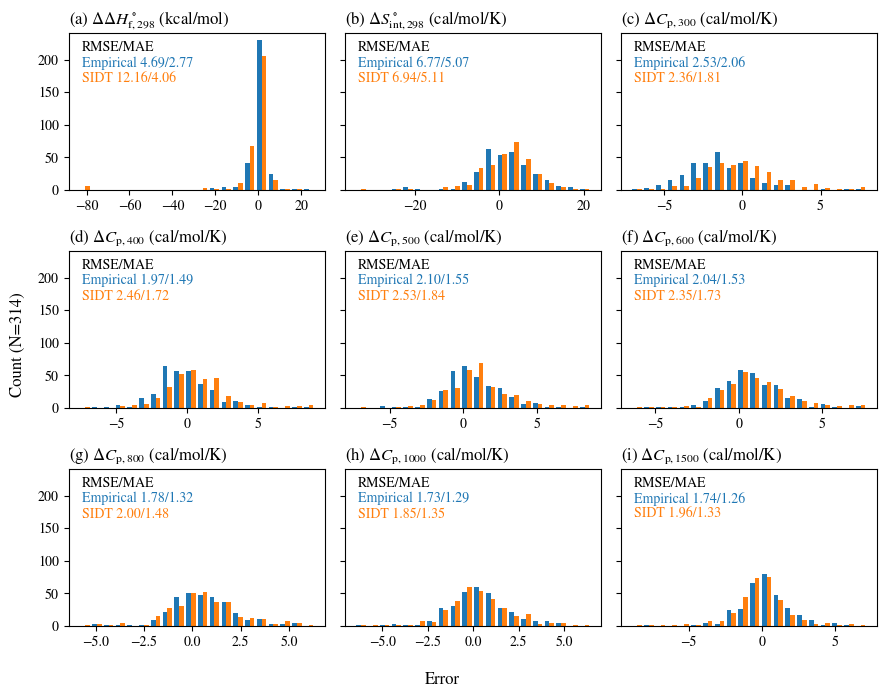

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
    ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
    ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/cluster_split_empirical_vs_sidt_error_hist.pdf", bbox_inches="tight")

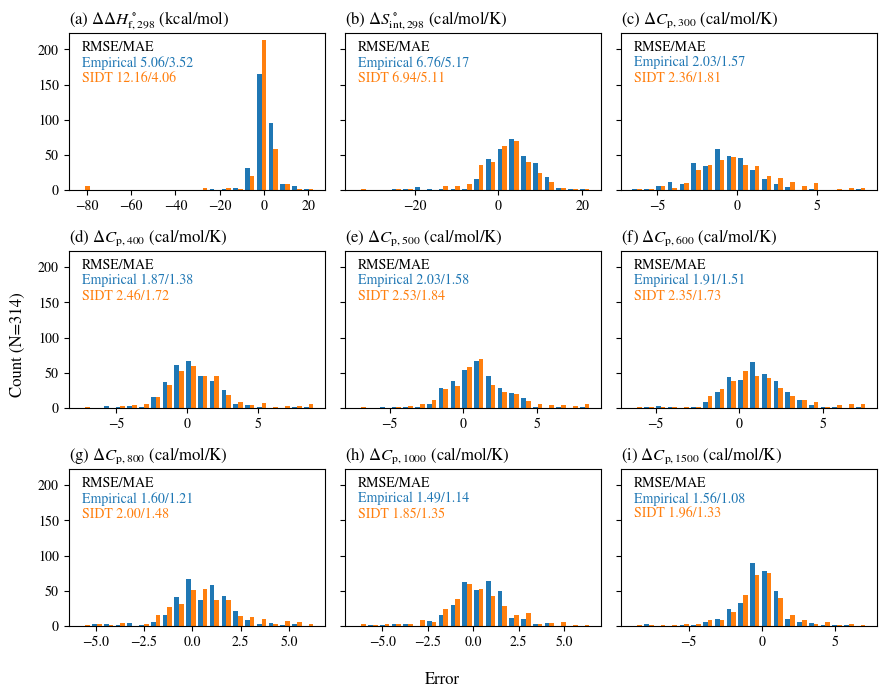

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_retrained_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
    ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
    ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/cluster_split_empirical_retrained_vs_sidt_error_hist.pdf", bbox_inches="tight")

In [7]:
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = sidt_df[label]
temp_df = test_df
temp_df[f"err_{label}"] = (pred_ys - true_ys).abs()
temp_df.sort_values(f"err_{label}", ascending=False)

,radical_smiles,resonance_radical_smiles,resonance_radical_num_rotatable_bonds,radical_H298 (kcal/mol),radical_Sint298 (cal/mol/K),radical_source,radical_level_of_theory,radical_Cp300 (cal/mol/K),radical_Cp400 (cal/mol/K),radical_Cp500 (cal/mol/K),...,unc_HBI_H298 (kcal/mol),unc_HBI_Sint298 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),unc_HBI_Cp500 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K),err_HBI_H298 (kcal/mol)
217,C=C(C)CC1[CH]CCC=C1C,C=C(C)CC1[CH]CCC=C1C,4,43.255503,116.505052,pang.py,CBS-QB3,49.869493,63.622233,76.290283,...,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,83.404303
218,C=C(C)CC1(C)[CH]CCC=C1,C=C(C)CC1(C)[CH]CCC=C1,4,43.837271,119.040539,pang.py,CBS-QB3,52.039296,65.354610,77.333852,...,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,82.576071
211,C=C(C)CC1[CH]CCC(C)=C1,C=C(C)CC1[CH]CCC(C)=C1,4,41.181982,116.181891,pang.py,CBS-QB3,50.040808,63.488275,75.802153,...,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,81.330782
268,C=C(C)CC1[CH]CC=C1,C=C(C)CC1[CH]CC=C1,3,58.659711,103.243997,pang.py,CBS-QB3,40.398566,50.792636,60.307867,...,1.697056,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,80.905865
214,C=C(C)CC1C=CCC[C]1C,C=C(C)CC1C=CCC[C]1C,4,41.989697,117.126749,pang.py,CBS-QB3,50.787843,64.014477,76.100659,...,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,80.858497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,[O]OC1C=CC(C2C=CCC=C2)C1,[O]OC1C=CC(C2C=CCC=C2)C1,2,50.529983,116.157009,pang.py,CBS-QB3,49.062658,62.377852,74.550017,...,1.697056,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.066868
168,CCN(OC1=C[CH]CC=C1)CC,CCN(OC1=C[CH]CC=C1)CC,6,28.476311,124.177977,pang.py,CBS-QB3,54.246286,68.075808,80.314831,...,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,0.056399
32,C=C(C)C(=C)COOC(C)(C)C(C)(C)[O],C=C(C)C(=C)COOC(C)(C)C(C)(C)[O],11,-31.286527,163.593178,dong_pio_liang.py,CBS-QB3,77.503004,94.426608,108.539895,...,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,0.054853
170,[CH2]CC(C)=C(C)C,[CH2]CC(C)=C(C)C,5,28.923730,108.603318,dong_pio_liang.py,CBS-QB3,35.068056,43.204076,51.206195,...,1.697056,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.020488


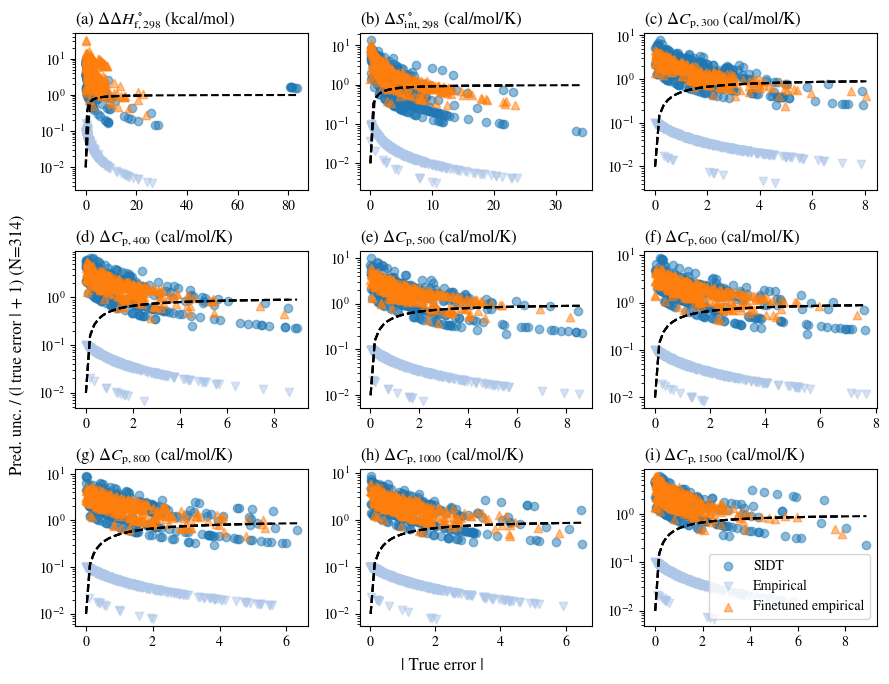

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))

cmap = plt.get_cmap("tab20")
counter = 0

for df_i, (temp_df, df_label) in enumerate(zip([sidt_df, empirical_df, empirical_retrained_df], ["SIDT", "Empirical", "Finetuned empirical"])):
        
        ax = axs.flat[0]
        label = "HBI_H298 (kcal/mol)"
        true_ys = test_df[label].values
        pred_ys = temp_df[label].values
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=cmap(df_i))
        xs = np.linspace(1e-2, max(true_errs), 50)
        ax.plot(xs, xs / (xs + 1), "k--")
        ax.set_yscale("log")
        ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

        ax = axs.flat[1]
        label = "HBI_Sint298 (cal/mol/K)"
        true_ys = test_df[label]
        pred_ys = temp_df[label]
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=cmap(df_i))
        xs = np.linspace(1e-2, max(true_errs), 50)
        ax.plot(xs, xs / (xs + 1), "k--")
        ax.set_yscale("log")
        ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

        for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
            label = f"HBI_Cp{T} (cal/mol/K)"
            true_ys = test_df[label]
            pred_ys = temp_df[label]
            pred_uncs = temp_df["unc_"+label].values
            true_errs = np.abs(pred_ys - true_ys)
            if df_label == "Empirical":
                pred_uncs[pred_uncs==0.0] = 0.1
            ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=cmap(df_i))
            xs = np.linspace(1e-2, max(true_errs), 50)
            ax.plot(xs, xs / (xs + 1), "k--")
            ax.set_yscale("log")
            ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
            
        counter += 1

axs.flat[-1].legend()
fig.supylabel(f"Pred. unc. / (| true error | + 1) (N={len(test_df.index)})")
fig.supxlabel(f"| True error |", y=0.03)
fig.tight_layout()

fig.savefig("../figures/cluster_split_unc_div_true_error_vs_true_error_sidt_vs_empirical.pdf", bbox_inches="tight")

# Plot: parity plot

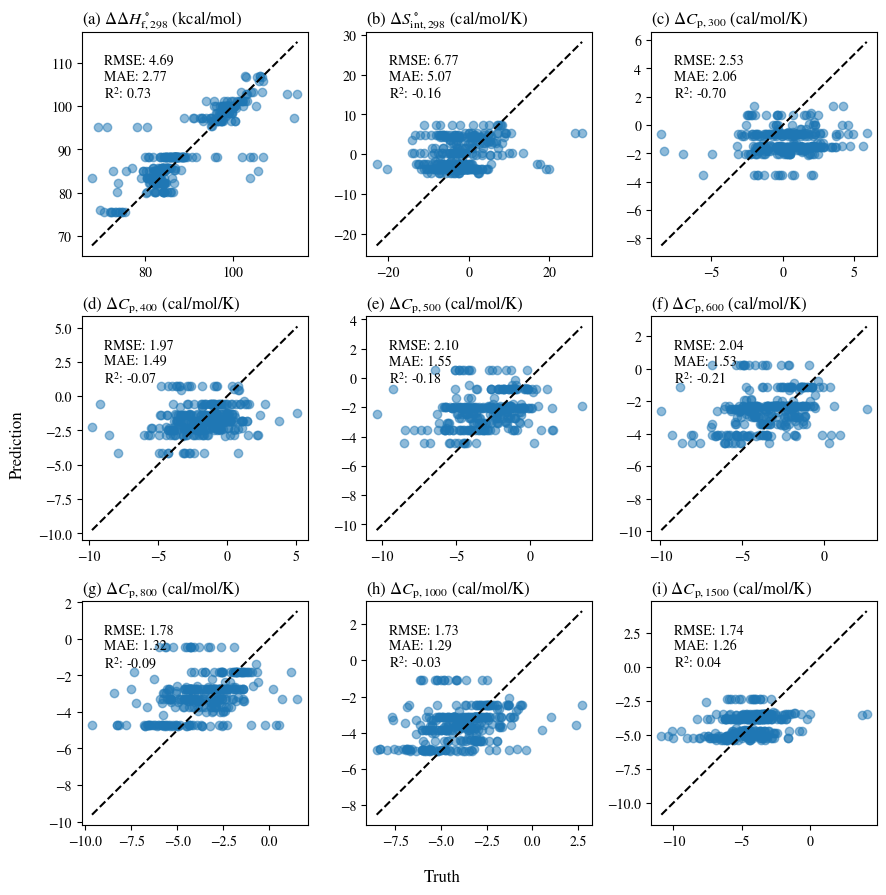

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/cluster_split_empirical_parity.pdf", bbox_inches="tight")

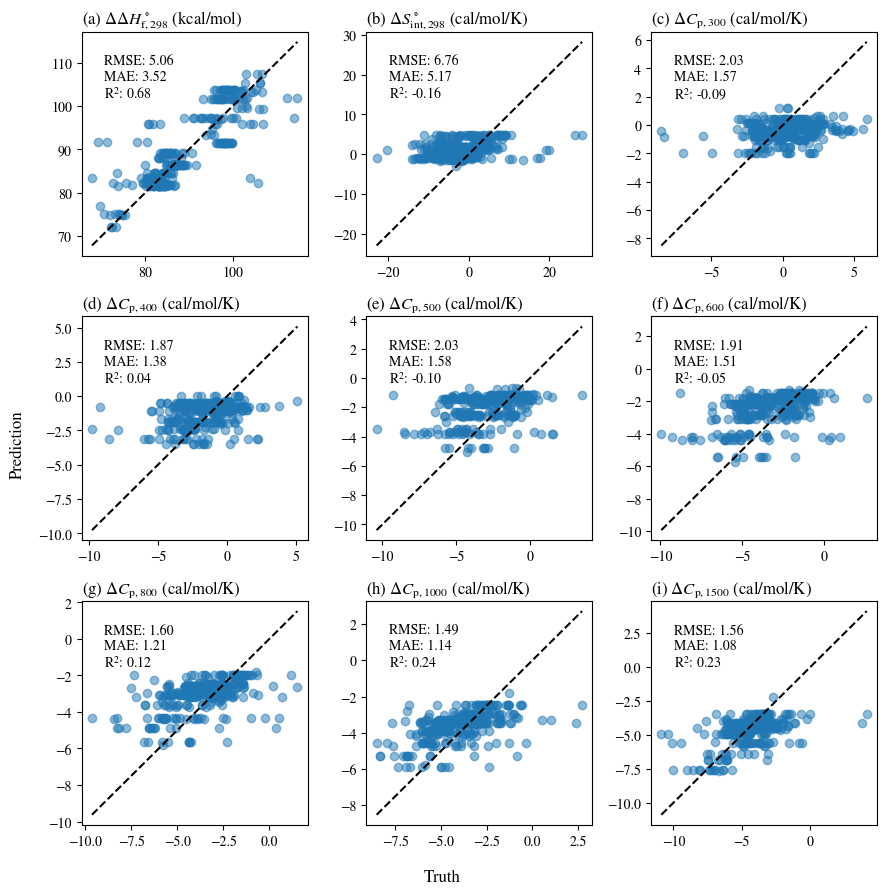

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_retrained_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_retrained_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_retrained_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/cluster_split_empirical_retrained_parity.pdf", bbox_inches="tight")

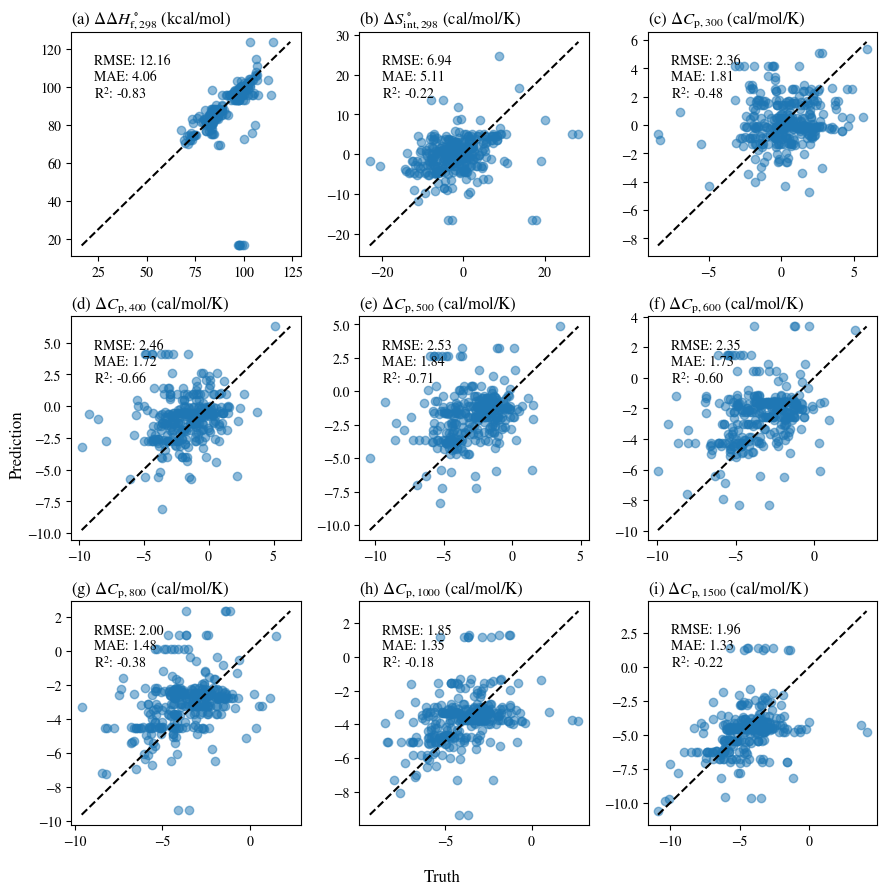

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = sidt_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = sidt_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = sidt_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/cluster_split_sidt_parity.pdf", bbox_inches="tight")

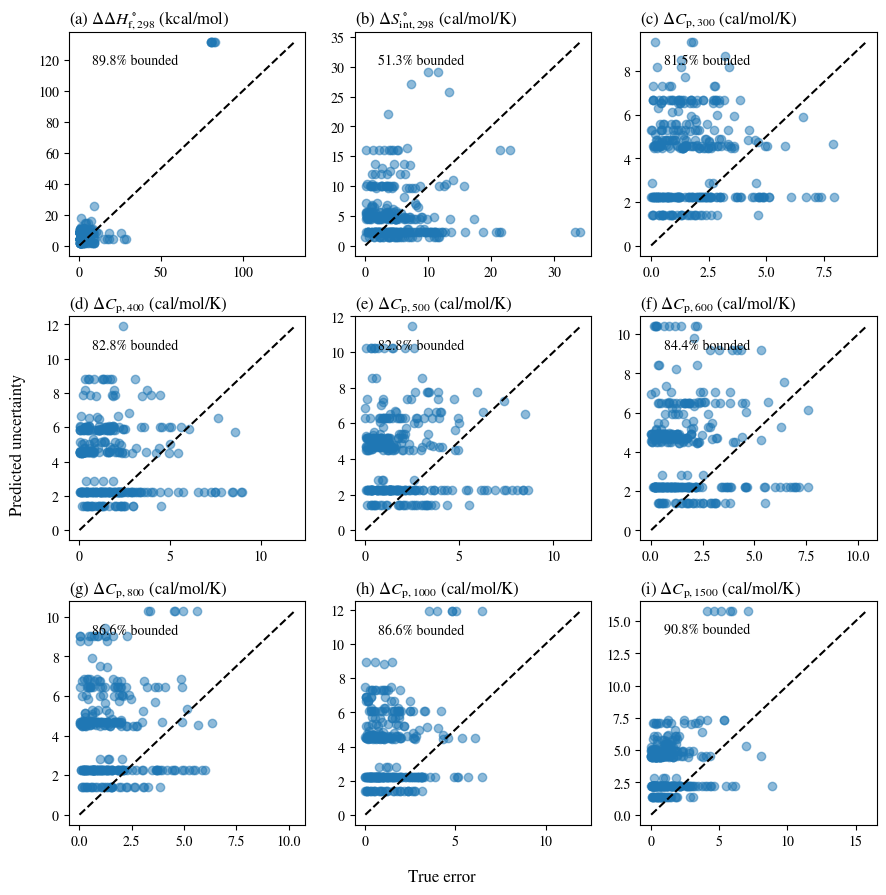

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = (sidt_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]).abs()
pred_ys = sidt_df["unc_HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

ax = axs.flat[1]
true_ys = (sidt_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]).abs()
pred_ys = sidt_df["unc_HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = (sidt_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]).abs()
    pred_ys = sidt_df[f"unc_HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
    ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
    # ax.set_yscale("log")
    # ax.set_xscale("log")

fig.supylabel(f"Predicted uncertainty")
fig.supxlabel(f"True error")

fig.tight_layout()
fig.savefig("../figures/cluster_split_sidt_unc_parity.pdf", bbox_inches="tight")